# DATA 240-21, Fall 2024
# Assignment #3 (Release on Nov 2nd, 2024, Due 11:59pm on Nov 19th, 2024)

### Notes
- This assignment should be submitted in Canvas as a format of ipython notebook (assignment3.ipynb).
- No late assignments will be accepted. Do not accept any other format. Minimum penalty is 2pts with acceptable excuse.
- You may collaborate on homework but must independently write code/solutions. Copying and other forms of cheating will not be tolerated and will result in a zero score for the homework (minimal penalty) or a failing grade for the course.
- Your work will be graded in terms of correctness, completeness, and clarity, not just the answer. Thus, correct answers with no or poorly written supporting steps may receive very little credit.

### NOTE: Please do not use any open-source algorithm for gradient decent method. Instead, you need to write gradient descent method from scratch.

In [17]:
import pandas as pd
import seaborn as sns

# Ensure up to 200 rows are shown
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

# 1. (5 pts) Linear regression with gradient decent

Please download housing.csv. This is a real-life dataset consisting of housing sales prices in the city of Windsor, Ontario, Canada. You can find a description of the variables in housing.txt. Our target variable is ‘price’.

- Linear regression using gradient descent method from scratch 
- This is the task of Linear regression with multi variables.

- You need to find the optimum Weights using gradient decent method from scratch.
- Before applying gradient descent method, you might need to normalize variables, which is called feature scaling or normalization.
- In gradient descent algorithm, weight needs to be updated every iteration.



In [18]:
df = pd.read_csv("data/housing.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [19]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Converting the column from object to int = {column =}")
        df[column] = df[column].replace({'yes': 1, 'no': 0})

df.describe()

Converting the column from object to int = column ='driveway'
Converting the column from object to int = column ='recroom'
Converting the column from object to int = column ='fullbase'
Converting the column from object to int = column ='gashw'
Converting the column from object to int = column ='airco'
Converting the column from object to int = column ='prefarea'


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [20]:
X_home, y_home = df[df.columns[1:]], df[df.columns[0]]
print(f"{X_home.shape = }, {y_home.shape = }")

X_home_mean = X_home.mean()
X_home_std = X_home.std()

X_home = (X_home - X_home_mean) / X_home_std

print(f"Training set size: {X_home.shape}")


X_home.shape = (546, 11), y_home.shape = (546,)
Training set size: (546, 11)


## 1-1. (3pts) Please build a gradient descent algorithm based on the following formulas.

- Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
- Please fit the data using the Linear regression model with the optimum Weight.
- To simply the problem, please plot ‘price’ vs ‘lotsize’ as the below. The ‘price’ and ‘lotsize’ should be original scale instead of normalized scale.
- Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2. The y and 𝑦̂  should be original scale instead of normalized scale.

In [21]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    
    def __init__(self, alpha=0.01, epochs=1000, cost_function=None):
        """
        Initialize Linear Regression Model with Gradient Descent.
        """
        self.alpha = alpha
        self.epochs = epochs
        self.cost_function = cost_function

        self.bias = 0
        self.weights = None
        self.cost_history = []

        print(f"Linear Regression Model with Gradient Descent Initialized with alpha={alpha}, epochs={epochs}, cost_function={self.cost_function}")

    def add_intercept(self, X):
        """
        Add an intercept term (column of ones) to the feature matrix.
        """
        return np.c_[np.ones(X.shape[0]), X]

    def compute_cost(self, y_actual, y_predictions):
        if self.cost_function is not None:
            cost = self.cost_function(y_actual, y_predictions)
        else:
            cost = (1 / (2 * len(y_actual))) * np.sum((y_predictions - y_actual)**2)
        return cost

    def update_weights(self, X, errors):
        m = len(errors)
        dw = (1 / m) * np.dot(X.T, errors)
        db = (1 / m) * np.sum(errors)
        self.weights -= self.alpha * dw
        self.bias -= self.alpha * db

    def fit(self, X, y):
        start = datetime.now()
        print(f"Start time for the gradient descent: {start}")
        m, n = X.shape
        self.weights = np.zeros(n)
        for epoch in range(self.epochs):
            predictions = np.dot(X, self.weights) + self.bias
            errors = predictions - y
            self.update_weights(X, errors)
            cost = self.compute_cost(y, predictions)
            self.cost_history.append(cost)
            if epoch <= 10 or epoch % 100 == 0 or epoch == self.epochs - 1:
                print(f'Epoch {epoch + 1}/{self.epochs}, Cost: {cost:.4f}')

        end = datetime.now()
        print(f"End time for the gradient descent: {end}, total time: {end - start}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=100)
        plt.plot(range(len(self.cost_history)), self.cost_history, marker='o')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence')
        plt.grid(True)
        plt.show()


Linear Regression Model with Gradient Descent Initialized with alpha=0.01, epochs=500, cost_function=<function simple_cost_function at 0x16d77e200>
Start time for the gradient descent: 2024-11-17 04:06:16.455247
Epoch 1/500, Cost: 2676139350.6538
Epoch 2/500, Cost: 2619270701.3875
Epoch 3/500, Cost: 2563810534.3818
Epoch 4/500, Cost: 2509717983.0959
Epoch 5/500, Cost: 2456953588.7131
Epoch 6/500, Cost: 2405479244.6080
Epoch 7/500, Cost: 2355258143.1934
Epoch 8/500, Cost: 2306254725.0389
Epoch 9/500, Cost: 2258434630.1612
Epoch 10/500, Cost: 2211764651.3880
Epoch 11/500, Cost: 2166212689.7047
Epoch 101/500, Cost: 432336269.9826
Epoch 201/500, Cost: 158920270.9319
Epoch 301/500, Cost: 122204267.9167
Epoch 401/500, Cost: 117175558.9640
Epoch 500/500, Cost: 116464590.4559
End time for the gradient descent: 2024-11-17 04:06:17.053977, total time: 0:00:00.598730


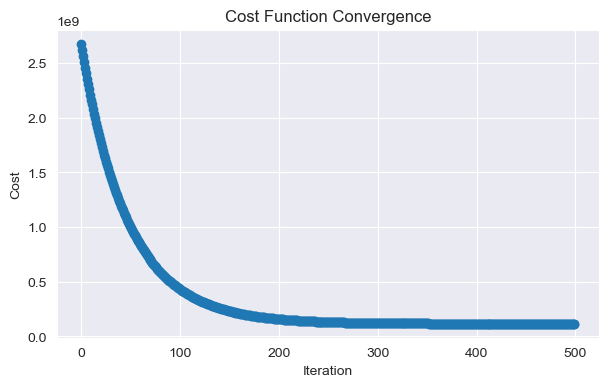

In [22]:
def simple_cost_function(y_actual, y_predictions):
    m = len(y_actual)
    cost = 0.0
    for i in range(m):
        cost += (y_predictions[i] - y_actual[i])**2
    cost = cost / (2 * m)
    return cost


lr = LinearRegressionGD(alpha=0.01, epochs=500, cost_function=simple_cost_function)
lr.fit(X_home, y_home)
y_pred = lr.predict(X_home)
lr.plot_cost()


## To simply the problem, please plot ‘price’ vs ‘lotsize’ as the below. The ‘price’ and ‘lotsize’ should be original scale instead of normalized scale.

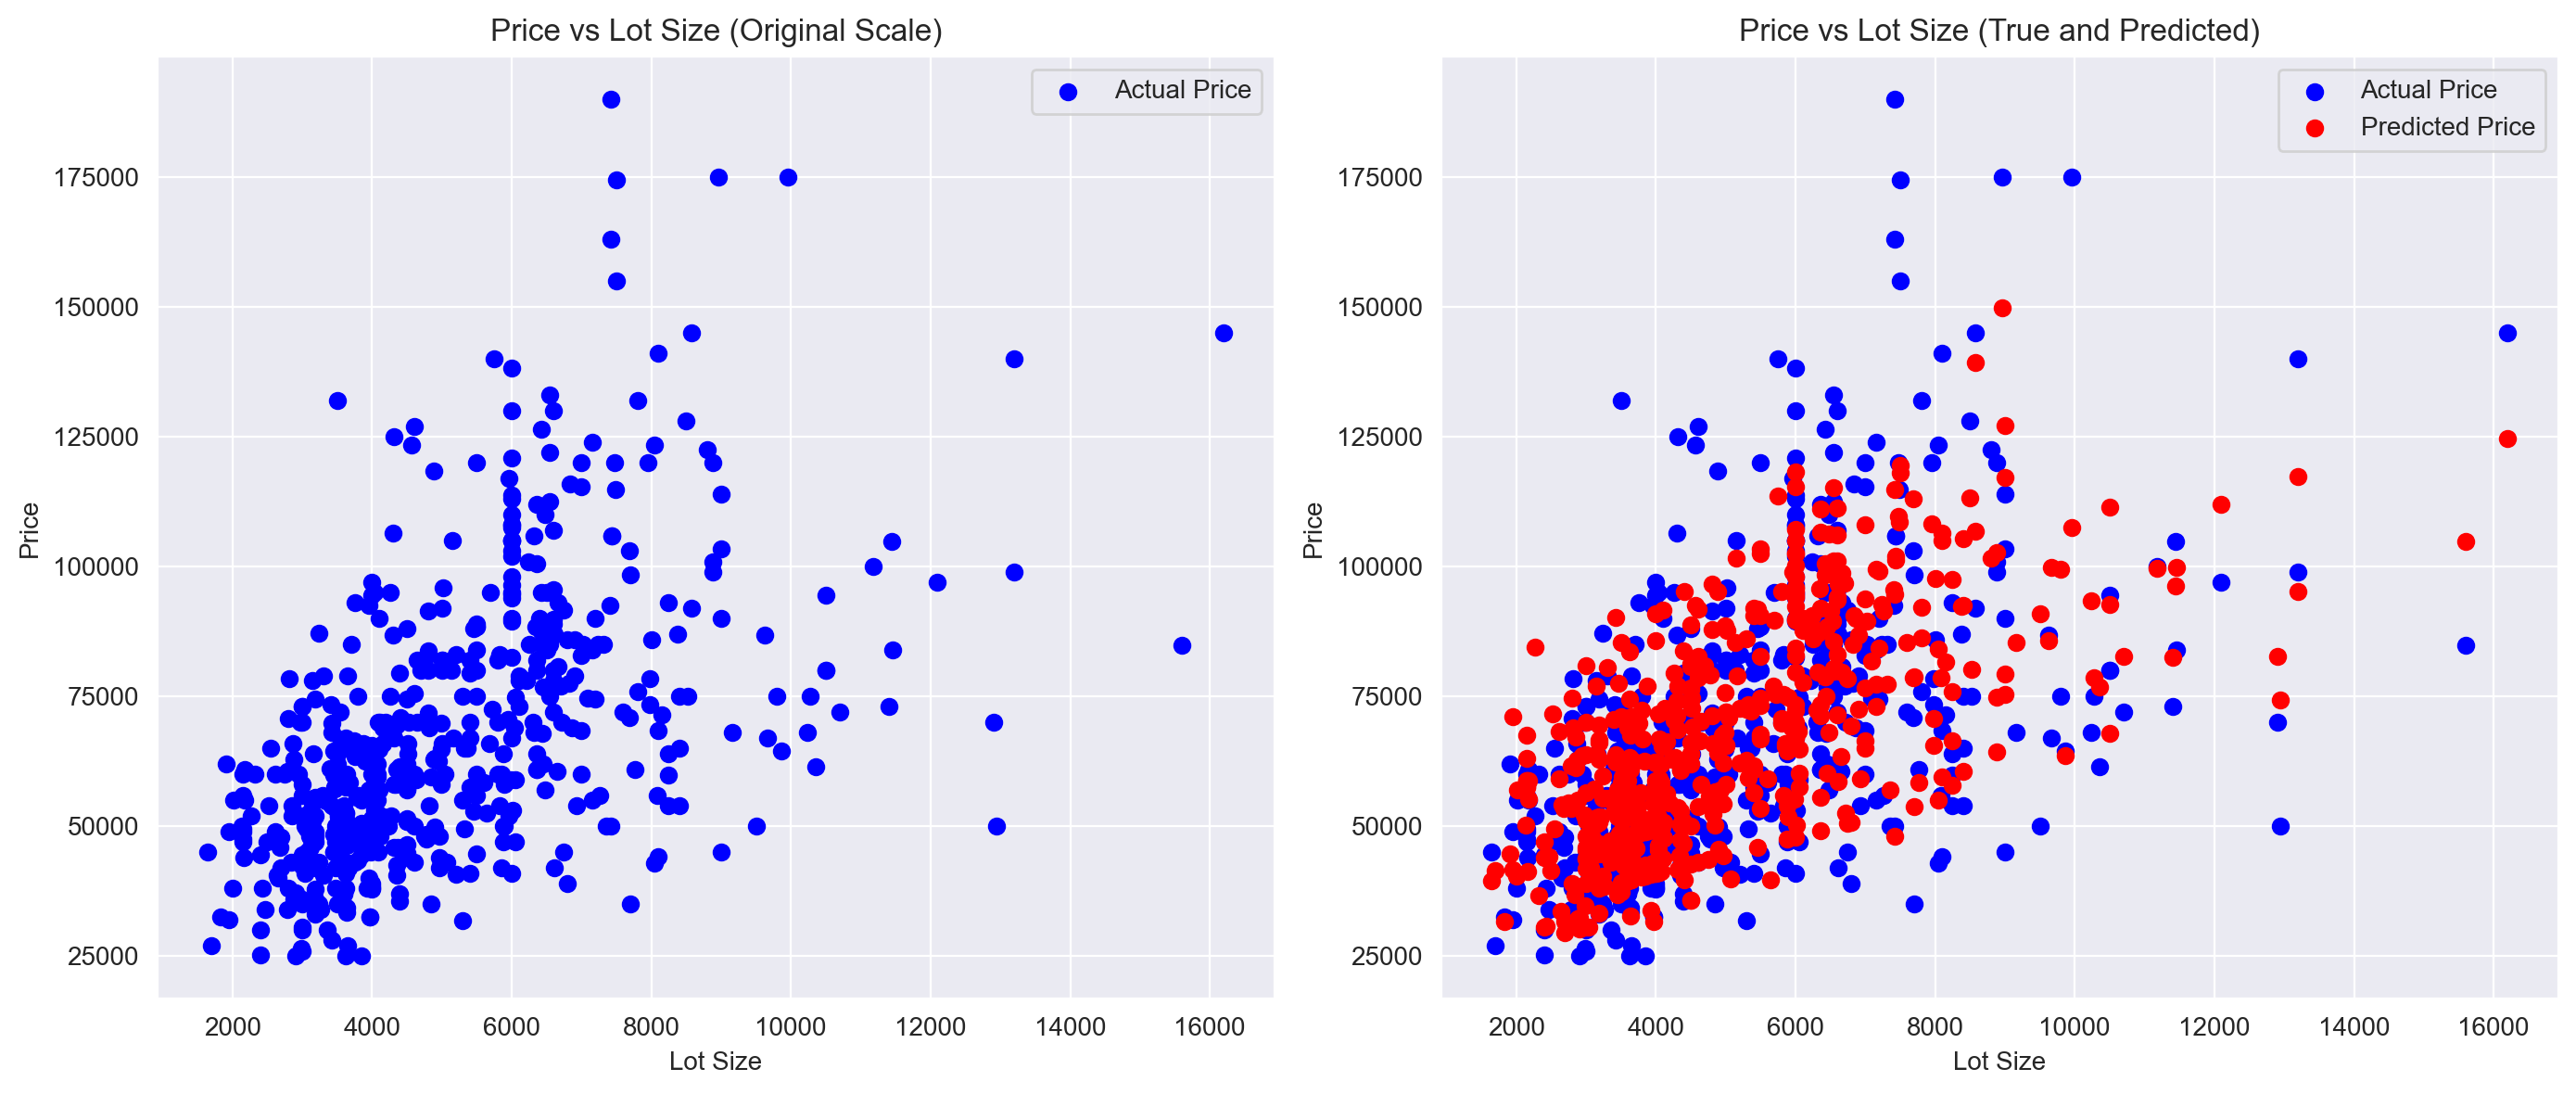

In [23]:

def scatter_plot_predictions(df, y, y_pred):
    # Extract original scale for lotsize
    lotsize = df['lotsize']

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=200)

    # Left plot: Price vs Lot size (original scale)
    # add trendline also
    axes[0].scatter(lotsize, y, color='blue', label='Actual Price')
    axes[0].set_title('Price vs Lot Size (Original Scale)')
    axes[0].set_xlabel('Lot Size')
    axes[0].set_ylabel('Price')
    axes[0].grid(True)
    axes[0].legend()

    # Right plot: Price vs Lot size with Actual and Predicted Prices
    axes[1].scatter(lotsize, y, color='blue', label='Actual Price')
    axes[1].scatter(lotsize, y_pred, color='red', label='Predicted Price')
    axes[1].set_title('Price vs Lot Size (True and Predicted)')
    axes[1].set_xlabel('Lot Size')
    axes[1].set_ylabel('Price')
    axes[1].grid(True)
    axes[1].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

scatter_plot_predictions(df, y_home, y_pred)

## Observations for Question - 1-1-2
- The Linear Regression Model with Gradient Descent is implemented.
- The max predicted value is 150000 and the max actual value is 190000.
- The model is predicting the house prices lower than the actual prices.

## 3- Please plot ‘true-price’(y) vs ‘predicted-price’(y^̂) and display R2. Th ey and  y?̂ should be original scale instead of normalized scale.


R2 Score: 0.6727


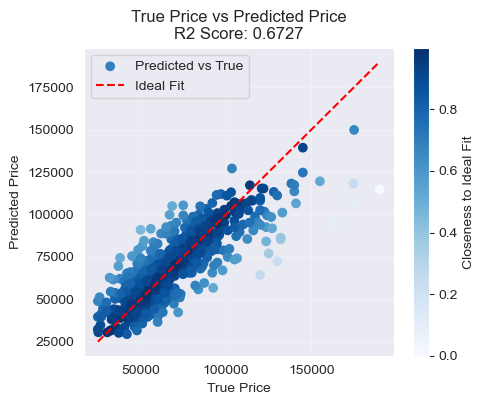

In [28]:
# Calculate R2 score

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2_score_value = 1 - (ss_residual / ss_total)
    print(f'R2 Score: {r2_score_value:.4f}')
    return r2_score_value


def r2_scatter_plot(y, y_pred, r2):
    # Calculate distance from the ideal fit line
    differences = np.abs(y - y_pred)
    normalized_diff = 1 - (differences / differences.max())  # Normalize distances to [0, 1]

    # Plot true price vs predicted price with dynamic color intensity
    plt.figure(figsize=(5, 4), dpi=100)
    scatter = plt.scatter(
        y, y_pred, c=normalized_diff, cmap='Blues', label='Predicted vs True'
    )
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
    plt.colorbar(scatter, label='Closeness to Ideal Fit')
    plt.title(f'True Price vs Predicted Price\nR2 Score: {r2:.4f}')
    plt.xlabel('True Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

r2 = r2_score(y_home, y_pred)
r2_scatter_plot(y_home, y_pred, r2)


# Observations for Question - 1-1-3

- The Linear Regression Model with Gradient Descent is implemented with two different cost functions.
- The first cost function is a simple cost function that calculates the cost by iterating over each sample.
- R2 Score is calculated for the model and it is 0.6727 which is close to 1.
- The model is predicting the house prices lower than the actual prices.

## 1-2. (2pts) Please build a gradient descent algorithm based on the following cost function.

- Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
- Please fit the data using the Linear regression model with the optimum Weight.
- Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2.


Linear Regression Model with Gradient Descent Initialized with alpha=0.01, epochs=500, cost_function=<function batch_compute_cost at 0x304124b80>
Start time for the gradient descent: 2024-11-17 04:08:28.468333
Epoch 1/500, Cost: 2676139350.6538
Epoch 2/500, Cost: 2619270701.3875
Epoch 3/500, Cost: 2563810534.3818
Epoch 4/500, Cost: 2509717983.0959
Epoch 5/500, Cost: 2456953588.7131
Epoch 6/500, Cost: 2405479244.6080
Epoch 7/500, Cost: 2355258143.1934
Epoch 8/500, Cost: 2306254725.0389
Epoch 9/500, Cost: 2258434630.1612
Epoch 10/500, Cost: 2211764651.3880
Epoch 11/500, Cost: 2166212689.7047
Epoch 101/500, Cost: 432336269.9826
Epoch 201/500, Cost: 158920270.9319
Epoch 301/500, Cost: 122204267.9167
Epoch 401/500, Cost: 117175558.9640
Epoch 500/500, Cost: 116464590.4559
End time for the gradient descent: 2024-11-17 04:08:28.692827, total time: 0:00:00.224494


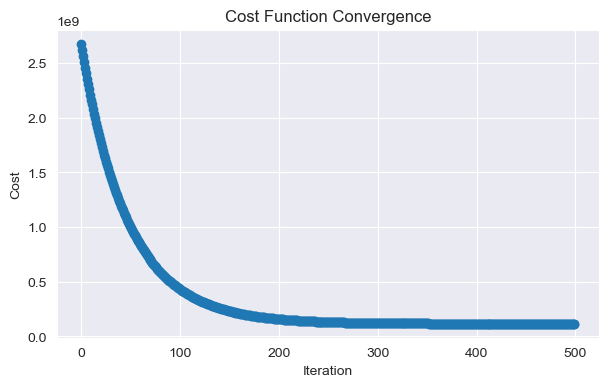

In [30]:
def batch_compute_cost(y_actual, y_predictions):
    m = len(y_actual)
    errors = y_predictions - y_actual
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost


lr = LinearRegressionGD(alpha=0.01, epochs=500, cost_function=batch_compute_cost)
lr.fit(X_home, y_home)
y_pred = lr.predict(X_home)
lr.plot_cost()

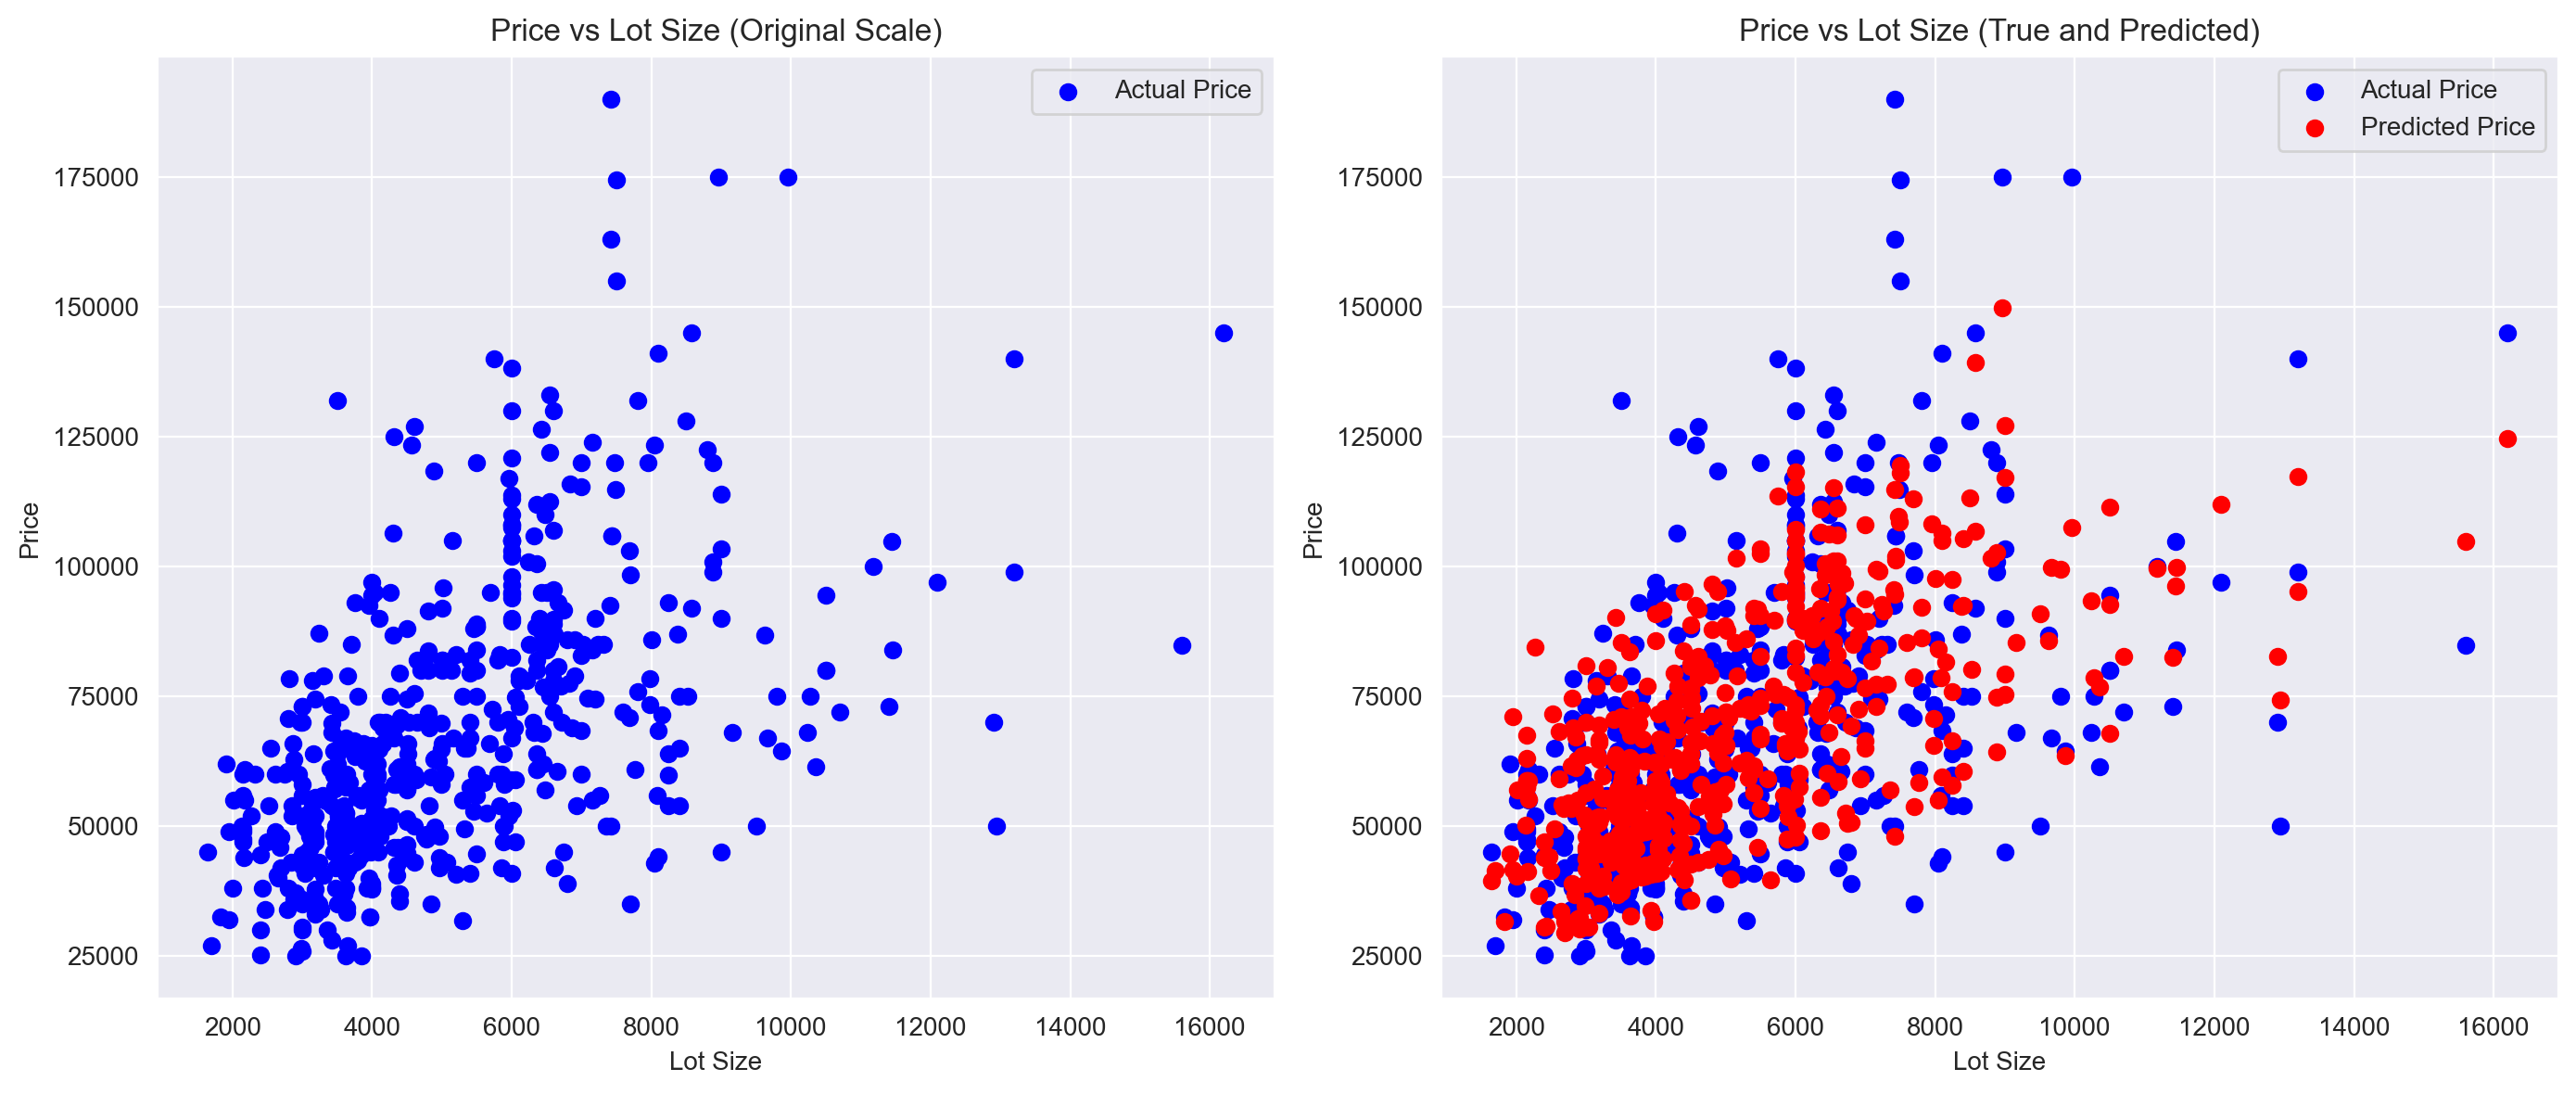

R2 Score: 0.6727


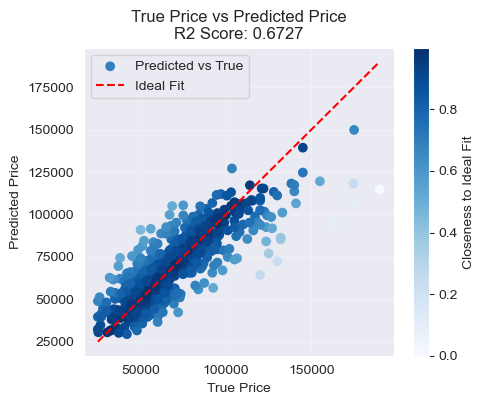

In [31]:
scatter_plot_predictions(df, y_home, y_pred)

r2 = r2_score(y_home, y_pred)
r2_scatter_plot(y_home, y_pred, r2)

# Observations for Question - 1
- The Linear Regression Model with Gradient Descent is implemented with two different cost functions.
- The first cost function is a simple cost function that calculates the cost by iterating over each sample.
- The second cost function is a batch cost function that calculates the cost using matrix operations.
- The batch cost function is more efficient and faster than the simple cost function.


# 2. (5 pts) Binary classification with logistic regression

- ### Please download heart_disease_train.csv and heart_disease_test.csv. The dataset is for cardiovascular study. The target variable is ‘TenYearCHD’, which shows whether the patient has 10-year risk of future coronary heart disease (CHD). You can find a description of the variables in cardiovascular.txt.

- ### This is the task of Binary classification with logistic regression. You need to build a logistic regression model from scratch to predict ‘TenYearCHD’.

- ### Before applying gradient descent method, you might need to fill out missing value and normalize variables.

In [32]:
heart_train_df = pd.read_csv("data/heart_disease_train.csv")
heart_test_df = pd.read_csv("data/heart_disease_test.csv")
heart_train_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [33]:
heart_train_df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3306.000000,3390.000000,3365.000000,3348.000000,3390.000000,3390.000000,3390.000000,3346.000000,3390.000000,3390.000000,3374.000000,3389.000000,3075.000000,3390.000000
mean,0.433628,49.614159,1.981246,0.486726,8.962556,0.028375,0.004720,0.302065,0.024779,236.759713,132.126696,82.752065,25.793874,75.776335,82.023089,0.152212
std,0.495648,8.609617,1.023009,0.499897,12.030447,0.166067,0.068548,0.459221,0.155473,45.347259,22.047822,11.933836,4.045690,11.952094,23.934546,0.359280
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.425000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Before applying gradient descent method, you might need to fill out missing value and normalize variables.

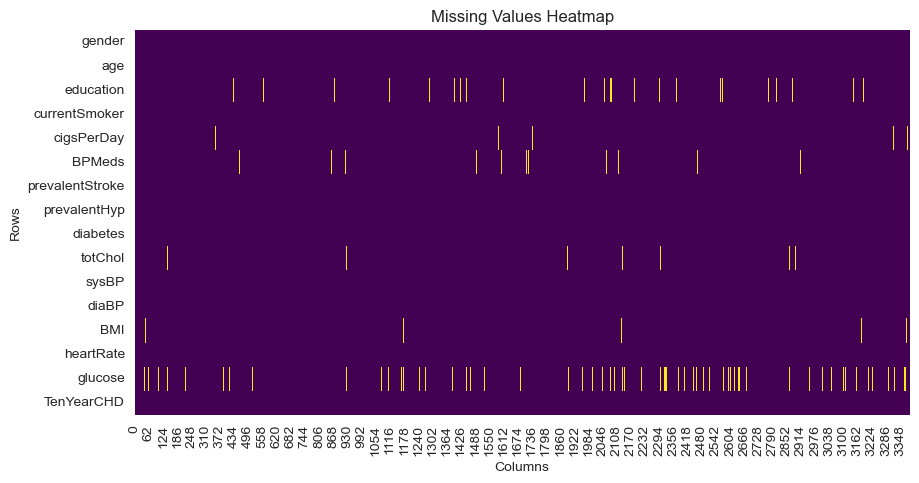

,column_name,column_dtype,distinct_values,missing_values,percent_missing,replacement_method
gender,gender,int64,2,0,0.000000,Mode
age,age,int64,39,0,0.000000,None
education,education,float64,4,84,2.477876,Mode
currentSmoker,currentSmoker,int64,2,0,0.000000,Mode
cigsPerDay,cigsPerDay,float64,32,25,0.737463,Mean/Median
BPMeds,BPMeds,float64,2,42,1.238938,Mode
prevalentStroke,prevalentStroke,int64,2,0,0.000000,Mode
prevalentHyp,prevalentHyp,int64,2,0,0.000000,Mode
diabetes,diabetes,int64,2,0,0.000000,Mode
totChol,totChol,float64,241,44,1.297935,Mean/Median


In [34]:
def find_missing_values(df):
    # Visualize missing values using a heatmap
    plt.figure(figsize=(10, 5), dpi=100)
    sns.heatmap(df.isnull().T, cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

    # Calculate missing values and distinct counts
    missing_values = df.isnull().sum()
    distinct_counts = df.nunique()

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'column_name': df.columns,
        'column_dtype': df.dtypes,
        'distinct_values': distinct_counts,
        'missing_values': missing_values,
        'percent_missing': missing_values / len(df) * 100,
        'replacement_method': [
            'Mode' if df[col].dtype == 'object' or distinct_counts[col] < 10 else 'Mean/Median'
            if missing_values[col] > 0 else None
            for col in df.columns
        ]
    })
    return results_df

missing_analysis_df = find_missing_values(heart_train_df)
missing_analysis_df.head(200)

In [35]:
sub_groups = ["gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"]

In [36]:
from scipy.stats import kurtosis

class MissingValueImputer:

    def __init__(self, train_data, subgroup_cols=None):
        """
        Initialize the imputer with training data and optional subgroup columns.

        Parameters:
        - train_data: DataFrame to analyze for missing value replacement.
        - subgroup_cols: List of column names to use for subgroup-based replacement.
        """
        self.train_data = train_data
        self.subgroup_cols = subgroup_cols if subgroup_cols else []
        self.replacement_values = {}

    def decide_replacement_method(self, series):
        """
        Determine whether to use mean or median based on the distribution.
        If the kurtosis is high (indicating outliers), use the median; otherwise, use the mean.
        """
        if kurtosis(series.dropna()) > 3:
            return 'Median'
        return 'Mean'

    def fit(self):
        """
        Calculate replacement values for each column in the training data.
        Stores the replacement values for each subgroup (if specified) or globally otherwise.
        """
        columns_with_missing = self.train_data.isnull().sum()
        columns_with_missing = columns_with_missing[columns_with_missing > 0].index

        for col in columns_with_missing:
            if self.subgroup_cols:
                # Subgroup-based replacement using multiple subgroup columns
                replacement_method = {}
                for subgroup, group_data in self.train_data.groupby(self.subgroup_cols):
                    if self.train_data[col].dtype == 'object' or self.train_data[col].nunique() < 10:
                        replacement_value = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                    else:
                        method = self.decide_replacement_method(group_data[col])
                        replacement_value = group_data[col].median() if method == 'Median' else group_data[col].mean()
                    replacement_method[subgroup] = replacement_value
                self.replacement_values[col] = replacement_method
            else:
                # Global replacement
                if self.train_data[col].dtype == 'object' or self.train_data[col].nunique() < 10:
                    self.replacement_values[col] = self.train_data[col].mode().iloc[0] if not self.train_data[col].mode().empty else np.nan
                else:
                    method = self.decide_replacement_method(self.train_data[col])
                    self.replacement_values[col] = self.train_data[col].median() if method == 'Median' else self.train_data[col].mean()


    def replace(self, data):
        for col, replacement in self.replacement_values.items():
            if isinstance(replacement, dict):  # Subgroup-based replacement
                data[col] = data.groupby(self.subgroup_cols)[col].apply(
                    lambda group: group.fillna(replacement.get(tuple(group.name), np.nan))
                ).reset_index(level=self.subgroup_cols, drop=True)
            else:  # Global replacement
                data[col] = data[col].fillna(replacement)
        return data


imputer = MissingValueImputer(heart_train_df, subgroup_cols=sub_groups)
imputer.fit()

heart_train_imputed_df = imputer.replace(heart_train_df.copy())
heart_test_imputed_df = imputer.replace(heart_test_df.copy())

print(f"Train : Null values after imputations = {heart_train_imputed_df.isnull().sum().sum()}")
print(f"Test : Null values after imputations = {heart_test_imputed_df.isnull().sum().sum()}")



Train : Null values after imputations = 0
Test : Null values after imputations = 0


In [37]:
heart_train_imputed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3390.0,0.433628,0.495648,0.00,0.00,0.000,1.000,1.0
age,3390.0,49.614159,8.609617,32.00,42.00,49.000,57.000,70.0
education,3390.0,1.961652,1.019580,1.00,1.00,2.000,3.000,4.0
currentSmoker,3390.0,0.486726,0.499897,0.00,0.00,0.000,1.000,1.0
cigsPerDay,3390.0,9.032161,12.018124,0.00,0.00,0.000,20.000,70.0
BPMeds,3390.0,0.028024,0.165065,0.00,0.00,0.000,0.000,1.0
prevalentStroke,3390.0,0.004720,0.068548,0.00,0.00,0.000,0.000,1.0
prevalentHyp,3390.0,0.302065,0.459221,0.00,0.00,0.000,1.000,1.0
diabetes,3390.0,0.024779,0.155473,0.00,0.00,0.000,0.000,1.0
totChol,3390.0,236.763368,45.068948,107.00,206.00,233.500,263.000,696.0


### -  Normalize Data

In [38]:
X_heart_train = heart_train_imputed_df[heart_train_imputed_df.columns[:-1]]
y_heart_train = heart_train_imputed_df[heart_train_imputed_df.columns[-1]]
X_heart_test = heart_test_imputed_df[heart_test_imputed_df.columns[:-1]]
y_heart_test = heart_test_imputed_df[heart_test_imputed_df.columns[-1]]


X_heart_mean = X_heart_train.mean()
X_heart_std = X_heart_train.std()

X_heart_train = (X_heart_train - X_heart_mean) / X_heart_std
X_heart_test = (X_heart_test - X_heart_mean) / X_heart_std

print(f"{X_heart_train.shape = }, {y_heart_train.shape = }")
print(f"{X_heart_test.shape = }, {y_heart_test.shape = }")



X_heart_train.shape = (3390, 15), y_heart_train.shape = (3390,)
X_heart_test.shape = (848, 15), y_heart_test.shape = (848,)


## 2-3 Please build a gradient descent algorithm based on the following formulas. Instead, you may build an algorithm based on the matrix formula.

## Please print out the Cost function J for every iteration (until 10 epochs) for the train dataset

Epoch 1/3000, Cost: 0.6931
Epoch 2/3000, Cost: 0.6888
Epoch 3/3000, Cost: 0.6845
Epoch 4/3000, Cost: 0.6803
Epoch 5/3000, Cost: 0.6762
Epoch 6/3000, Cost: 0.6721
Epoch 7/3000, Cost: 0.6681
Epoch 8/3000, Cost: 0.6642
Epoch 9/3000, Cost: 0.6604
Epoch 10/3000, Cost: 0.6567
Epoch 301/3000, Cost: 0.4015
Epoch 601/3000, Cost: 0.3857
Epoch 901/3000, Cost: 0.3831
Epoch 1201/3000, Cost: 0.3824
Epoch 1501/3000, Cost: 0.3822
Epoch 1801/3000, Cost: 0.3822
Epoch 2101/3000, Cost: 0.3821
Epoch 2401/3000, Cost: 0.3821
Epoch 2701/3000, Cost: 0.3821
Epoch 3000/3000, Cost: 0.3821


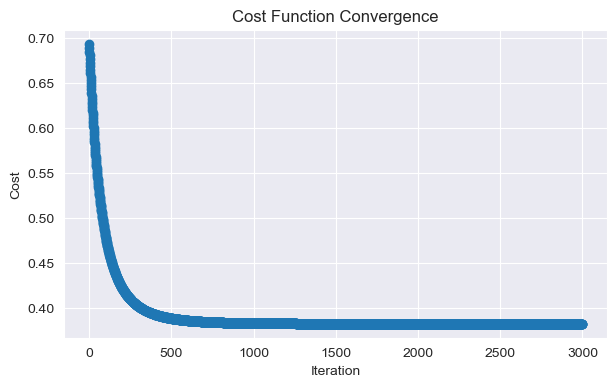

In [41]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, func='sigmoid'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.func = func
        self.weights = None
        self.bias = None
        self.costs = []

    def logistic_function(self, z):
        if self.func == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.func == 'bipolar_sigmoid':
            return (2 / (1 + np.exp(-z))) - 1
        elif self.func == 'tanh_scaled':
            return 0.5 * (np.tanh(z) + 1)
        else:
            raise ValueError(f"Unsupported logistic function: {self.func}")

    def initialize_parameters(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def compute_cost(self, y_actual, y_pred):
        num_samples = len(y_actual)
        cost = - (1 / num_samples) * np.sum(y_actual * np.log(y_pred) + (1 - y_actual) * np.log(1 - y_pred))
        return cost

    def update_weights(self, y_actual, y_pred, X):
        num_samples = len(y_actual)
        error = y_pred - y_actual
        dw = (1 / num_samples) * np.dot(X.T, error)
        db = (1 / num_samples) * np.sum(error)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_parameters(num_features)

        for i in range(self.num_iterations):
            predictions = self.predict_scores(X)
            self.update_weights(y, predictions, X)
            cost = self.compute_cost(y, predictions)
            self.costs.append(cost)
            if i < 10 or i % (self.num_iterations/10) == 0 or i == self.num_iterations - 1:
                print(f'Epoch {i + 1}/{self.num_iterations}, Cost: {cost:.4f}')

    def predict_scores(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.logistic_function(linear_model)

    def predict(self, X):
        predictions = self.predict_scores(X)
        return (predictions > 0.5).astype(int)

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=100)
        plt.plot(range(len(self.costs)), self.costs, marker='o')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence')
        plt.grid(True)
        plt.show()


logistic_regression = LogisticRegression(learning_rate=0.03, num_iterations=3000)
logistic_regression.fit(X_heart_train, y_heart_train)
logistic_regression.plot_cost()


## Please print out confusion matrix and its corresponding accuracy, precision, and recall for the train and test dataset after the last iteration.

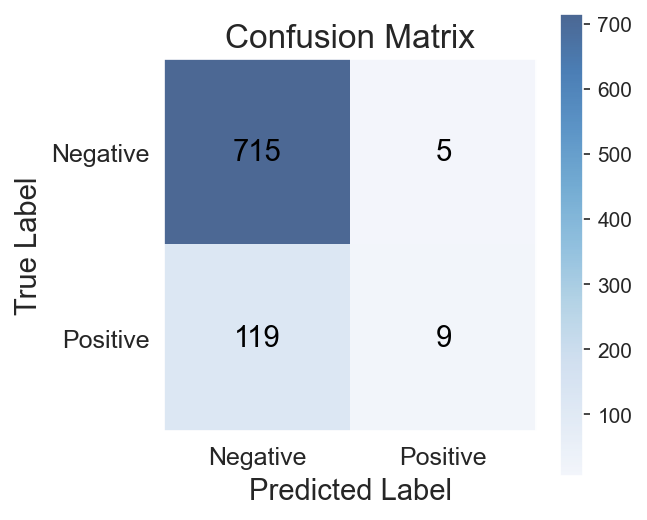

Metrics on the test data.
	 True Positive (TP): 9.0000
	 True Negative (TN): 715.0000
	 False Positive (FP): 5.0000
	 False Negative (FN): 119.0000
	 Precision: 0.6429
	 Recall: 0.0703
	 F1 Score: 0.1268
	 Accuracy: 0.8538
	 ROC AUC: 0.7577


In [42]:
def compute_metrics(y_true, y_pred, y_scores=None, plot_confusion_matrix=True):
    """
    Compute evaluation metrics (TP, FP, TN, FN, Precision, Recall, F1, Accuracy, ROC AUC)
    and optionally plot the confusion matrix.
    """
    # Confusion Matrix Components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Precision, Recall, F1 Score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    roc_auc = None
    if y_scores is not None:
        from sklearn.metrics import roc_auc_score
        roc_auc = roc_auc_score(y_true, y_scores)

    metrics = {
        'True Positive (TP)': TP,
        'True Negative (TN)': TN,
        'False Positive (FP)': FP,
        'False Negative (FN)': FN,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc
    }

    # Plot Confusion Matrix
    if plot_confusion_matrix:
        plt.figure(figsize=(4, 4), dpi=150)
        cm = np.array([[TN, FP], [FN, TP]])
        plt.imshow(cm, cmap='Blues', alpha=0.7)
        plt.title("Confusion Matrix", fontsize=16)
        plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=12)
        plt.yticks([0, 1], ['Negative', 'Positive'], fontsize=12)
        plt.xlabel("Predicted Label", fontsize=14)
        plt.ylabel("True Label", fontsize=14)
        plt.grid(False)
        for i in range(2):
            for j in range(2):
                plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14, color='black')

        plt.colorbar()
        plt.show()

    return metrics


y_test_pred_probabilities = logistic_regression.predict_scores(X_heart_test)
y_test_pred = logistic_regression.predict(X_heart_test)

test_metrics = compute_metrics(y_heart_test, y_test_pred, y_test_pred_probabilities)
print(f"Metrics on the test data.")
for key, value in test_metrics.items():
    print(f"\t {key}: {value:.4f}")